# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
%config IPCompleter.greedy=True

In [2]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


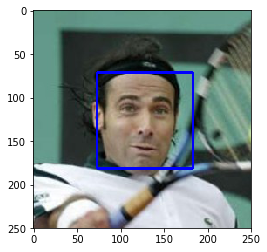

In [3]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[1])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [4]:
import cv2

# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [5]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

In [6]:
## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

# Human images
human_faces_detected = 0;

for i in range(len(human_files_short)):       
    human_face_is_detected = face_detector(human_files_short[i])    
    if human_face_is_detected:
        human_faces_detected += 1                
else:
    print(format(human_faces_detected / (i+1) *100, '.2f'), 
          '% of the first 100 images in human_files have a detected human face.')
    
# Dog images
human_faces_detected = 0;

for i in range(len(dog_files_short)):       
    human_face_is_detected = face_detector(dog_files_short[i])    
    if human_face_is_detected:
        human_faces_detected += 1
else:
    print(format(human_faces_detected / (i+1) *100, '.2f'), 
          '% of the first 100 images in dog_files have a detected human face.')


98.00 % of the first 100 images in human_files have a detected human face.
17.00 % of the first 100 images in dog_files have a detected human face.


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [7]:
import torch
import torchvision.models as models

# check if CUDA is available
use_cuda = torch.cuda.is_available()

In [8]:
# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [9]:
from PIL import Image
import torchvision.transforms as transforms
import requests

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # VGG-16 Takes 224x224 images as input
    data_transform = transforms.Compose([transforms.RandomResizedCrop(224), 
                                         transforms.ToTensor()])
    img = Image.open(img_path)
    img = data_transform(img)
    img.unsqueeze_(0) 
    
    if use_cuda:
        img = img.cuda()
        
    output = VGG16(img)
    _, preds_tensor = torch.max(output, 1)
    
    prediction = np.squeeze(preds_tensor.numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())

    return prediction.flat[0] # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [10]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    
    prediction = VGG16_predict(img_path)
    if prediction > 150 and prediction < 269:
        return True
    return False

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [11]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

# Human images
dogs_detected = 0

for i in range(len(human_files_short)):
    dog_is_detected = dog_detector(human_files_short[i])
    if dog_is_detected:
        dogs_detected += 1
else:
    print(format(dogs_detected / (i+1) *100, '.2f'), 
          '% of the images in human_files_short have a detected dog.')
    
# Dog images
dogs_detected = 0;

for i in range(len(dog_files_short)):
    dog_is_detected = dog_detector(dog_files_short[i])
    if dog_is_detected:
        dogs_detected += 1
else:
    print(format(dogs_detected / (i+1) *100, '.2f'), 
          '% of the images in dog_files_short have a detected dog.')

0.00 % of the images in human_files_short have a detected dog.
86.00 % of the images in dog_files_short have a detected dog.


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

Since I am not currently familiar with TensorFlow, the code below is partly copied from the following article:
https://towardsdatascience.com/deep-learning-build-a-dog-detector-and-breed-classifier-using-cnn-f6ea2e5d954a

In [36]:
from keras.preprocessing import image
from tqdm import tqdm
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
ResNet50_model = ResNet50(weights='imagenet')

Using TensorFlow backend.


102858752/102853048 [==============================] - 1s 0us/step


In [37]:
def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def ResNet50_predict_labels(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))

### returns "True" if a dog is detected in the image stored at img_path
def dog_detector_resnet(img_path):
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151))

In [7]:
# Human images
dogs_detected = 0

for i in range(len(human_files_short)):
    if dog_detector_resnet(human_files_short[i]):
        dogs_detected += 1
else:
    print(format(dogs_detected / (i+1) *100, '.2f'), 
          '% of the images in human_files_short have a detected dog.')
    
# Dog images
dogs_detected = 0;

for i in range(len(dog_files_short)):
    if dog_detector_resnet(dog_files_short[i]):
        dogs_detected += 1
else:
    print(format(dogs_detected / (i+1) *100, '.2f'),
          '% of the images in dog_files_short have a detected dog.')

0.00 % of the images in human_files_short have a detected dog.
100.00 % of the images in dog_files_short have a detected dog.


In [8]:
dog_detector_resnet(dog_files[15])

True

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [12]:
import os
import torchvision.transforms as transforms
from torchvision import datasets

## Specify appropriate transforms, and batch_sizes

transform_train = transforms.Compose([
    transforms.Resize(250),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], 
                         [0.5, 0.5, 0.5])
    ])

transform_test = transforms.Compose([
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], 
                         [0.5, 0.5, 0.5])
    ])

train_data = datasets.ImageFolder('/data/dog_images/train', transform=transform_train)
validation_data = datasets.ImageFolder('/data/dog_images/valid', transform=transform_test)
test_data = datasets.ImageFolder('/data/dog_images/test', transform=transform_test)

### TODO: Write data loaders for training, validation, and test sets

batch_size = 40

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(validation_data, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

loaders_scratch = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader }

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

- My code resizes the images by center cropping to keep the ratio - I think when regocnizing dogs the shape of the dog face is important. I made the image size 224x224 since it is nicer to compare the results with VGG-16 results when the images are the same size and you can also divide 224 by two many times (pooling with 2x2 kernel is easy).
- I decided to augment the dataset as follows:
  - Resize to make it easier to handle (but in the beginning I kept it big enough to rotate and crop nicely)
  - Random horizontal flip and random rotation to add variations
  - Center crop to keep the ratio but make it square
  - Normalizing to keep the weights near zero (backpropagation is more stable and network learns better)

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [13]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1) # 3 x 224x224 → 16 x 112x112
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1) # 16 x 112x112 → 32 x 56x56
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1) # 32 x 56x56 → 64 x 28x28
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1) # 64 x 28x28 → 128 x 14x14
        
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
        # input = count of images * height*width, output count
        self.fc1 = nn.Linear(128*(14*14), 500)
        self.fc2 = nn.Linear(500, 250)
        self.fc3 = nn.Linear(250, 133)
        
        self.dropout = nn.Dropout(p=0.2)
        
    
    def forward(self, x):
        ## Define forward behavior
        
        # convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        
        # flattening
        x = x.view(-1, 128*14*14)
        
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print(model_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=25088, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=250, bias=True)
  (fc3): Linear(in_features=250, out_features=133, bias=True)
  (dropout): Dropout(p=0.2)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
First I started with 3 convolutional layers but added one more when realized there was 50k inputs in the end. I also wanted to make sure the network works well enough to get over 10% test accuracy (more layers make it more precise but slower to train).

Max pooling is done by 2x2 kernel that cuts half of the size of the layers. The dropout percentage is 20% to avoid overfitting.

There are three fully connected layers - I thought that is enough when the images are processed well in convolutional layers.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [14]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = torch.optim.SGD(model_scratch.parameters(), lr=0.05)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [15]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear the gradients
            optimizer_scratch.zero_grad()
            # forward pass
            output = model_scratch(data)
            # batch loss
            loss = criterion_scratch(output, target)
            # backward pass
            loss.backward()
            # optimization step
            optimizer.step()
            # training loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            ## update the average validation loss
            valid_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('saving model')
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model

In [16]:
# train the model
model_scratch = train(60, loaders_scratch, model_scratch, optimizer_scratch,
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.889891 	Validation Loss: 4.889307
saving model
Epoch: 2 	Training Loss: 4.885012 	Validation Loss: 4.885638
saving model
Epoch: 3 	Training Loss: 4.878112 	Validation Loss: 4.877201
saving model
Epoch: 4 	Training Loss: 4.870218 	Validation Loss: 4.869947
saving model
Epoch: 5 	Training Loss: 4.841433 	Validation Loss: 4.838151
saving model
Epoch: 6 	Training Loss: 4.715463 	Validation Loss: 4.715318
saving model
Epoch: 7 	Training Loss: 4.621253 	Validation Loss: 4.621172
saving model
Epoch: 8 	Training Loss: 4.532205 	Validation Loss: 4.537292
saving model
Epoch: 9 	Training Loss: 4.454089 	Validation Loss: 4.453824
saving model
Epoch: 10 	Training Loss: 4.369046 	Validation Loss: 4.374613
saving model
Epoch: 11 	Training Loss: 4.287877 	Validation Loss: 4.288202
saving model
Epoch: 12 	Training Loss: 4.226434 	Validation Loss: 4.217024
saving model
Epoch: 13 	Training Loss: 4.158705 	Validation Loss: 4.155560
saving model
Epoch: 14 	Training Loss: 4.098268

In [18]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

if use_cuda:
    model_scratch.cuda()

In [19]:
model_scratch

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=25088, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=250, bias=True)
  (fc3): Linear(in_features=250, out_features=133, bias=True)
  (dropout): Dropout(p=0.2)
)

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [20]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [21]:
# call test function
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 6.154765


Test Accuracy: 13% (113/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [22]:
## TODO: Specify data loaders

loaders_transfer = loaders_scratch

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [23]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture

model_transfer = models.vgg16(pretrained=True)

# Freeze training for all "features" layers
for param in model_transfer.features.parameters():
    param.requires_grad = False

# Output layer with 133 labels (this also sets param.requires_grad = True)
model_transfer.classifier[6] = torch.nn.Linear(4096, 133)

if use_cuda:
    model_transfer = model_transfer.cuda()

In [24]:
model_transfer

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
I decided continue using VGG16 as it classifies dog breeds already in some level. Since the new (dog images) data was not that big and it's similar to the data VGG16 already knows I just decided to replace the last output layer.

I froze the features parameters so that the new data does not affect the whole network and edited the last layer to have 133 outputs so that it matches the number of dog breeds we're handling here. (Editing the layer sets param.requires_grad to True so the weights are changing when trained.)

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [25]:
import torch.optim as optim

criterion_transfer = torch.nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(VGG16.classifier.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [26]:
def train_transfer(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear the gradients
            optimizer_transfer.zero_grad()
            # forward pass
            output = model_transfer(data)
            # batch loss
            loss = criterion_transfer(output, target)
            # backward pass
            loss.backward()
            # optimization step
            optimizer.step()
            # training loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            ## update the average validation loss
            valid_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('saving model')
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model

In [44]:
# train the model
n_epochs = 20

# HIDDEN SO THAT NOT ACCIDENTALLY RUN AND OVERRIDE TRAINED MODEL
# model_transfer = train_transfer(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 2.232109 	Validation Loss: 2.181472
saving model
Epoch: 2 	Training Loss: 0.907641 	Validation Loss: 0.900953
saving model
Epoch: 3 	Training Loss: 0.713767 	Validation Loss: 0.716733
saving model
Epoch: 4 	Training Loss: 0.637549 	Validation Loss: 0.636338
saving model
Epoch: 5 	Training Loss: 0.537984 	Validation Loss: 0.535899
saving model
Epoch: 6 	Training Loss: 0.476447 	Validation Loss: 0.482533
saving model
Epoch: 7 	Training Loss: 0.435739 	Validation Loss: 0.427328
saving model
Epoch: 8 	Training Loss: 0.393702 	Validation Loss: 0.419176
saving model
Epoch: 9 	Training Loss: 0.349538 	Validation Loss: 0.350268
saving model
Epoch: 10 	Training Loss: 0.320678 	Validation Loss: 0.328164
saving model
Epoch: 11 	Training Loss: 0.304857 	Validation Loss: 0.295087
saving model
Epoch: 12 	Training Loss: 0.278861 	Validation Loss: 0.274455
saving model
Epoch: 13 	Training Loss: 0.248107 	Validation Loss: 0.248390
saving model
Epoch: 14 	Training Loss: 0.247314

In [27]:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

In [23]:
# more training to test if affects accuracy
#model_transfer = train_transfer(10, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

Epoch: 1 	Training Loss: 0.092944 	Validation Loss: 0.090996
saving model
Epoch: 2 	Training Loss: 0.091127 	Validation Loss: 0.091181
Epoch: 3 	Training Loss: 0.085896 	Validation Loss: 0.086908
saving model
Epoch: 4 	Training Loss: 0.085928 	Validation Loss: 0.083568
saving model
Epoch: 5 	Training Loss: 0.073493 	Validation Loss: 0.075150
saving model
Epoch: 6 	Training Loss: 0.077663 	Validation Loss: 0.076314
Epoch: 7 	Training Loss: 0.079345 	Validation Loss: 0.077495
Epoch: 8 	Training Loss: 0.079198 	Validation Loss: 0.078114
Epoch: 9 	Training Loss: 0.073313 	Validation Loss: 0.072335
saving model
Epoch: 10 	Training Loss: 0.064116 	Validation Loss: 0.067633
saving model


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [47]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.585558


Test Accuracy: 83% (700/836)


In [27]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.598318


Test Accuracy: 85% (716/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [29]:
import matplotlib.pyplot as plt
from PIL import Image

In [30]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

train_data = datasets.ImageFolder('/data/dog_images/train', transform=transform)

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    
    img = Image.open(img_path)

    data_transform = transforms.Compose([transforms.RandomResizedCrop(224), 
                                         transforms.ToTensor()])
    img = data_transform(img)
    img.unsqueeze_(0)
    
    if use_cuda:
        img = img.cuda()

    # Evaluation mode
    model_transfer.eval()
    
    output = model_transfer(img)
    
    _, preds_tensor = torch.max(output, 1)
    prediction = torch.argmax(output).item()
    
    # Evaluation mode off
    model_transfer.train()

    return class_names[prediction]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [31]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    
    # Display thumbnail of the image
    img = Image.open(img_path)
    img.thumbnail((200,200), Image.ANTIALIAS)
    display(img)
  
    if dog_detector(img_path):
        print("Hello dog. I think your breed is " + predict_breed_transfer(img_path) + ".")    
    elif face_detector(img_path):
        print("Hello human. If you were a dog you would be a " + predict_breed_transfer(img_path) + "!")        
    else:
        print("Hello you. I do not recognize you to be a dog or a human.")

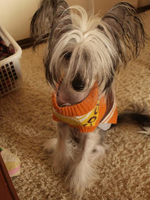

Hello dog. I think your breed is Chinese crested.


In [32]:
run_app(dog_files[281])

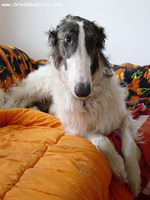

Hello dog. I think your breed is Borzoi.


In [34]:
run_app(dog_files[180])

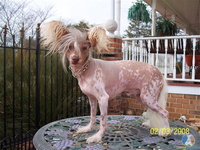

Hello dog. I think your breed is Chinese crested.


In [35]:
run_app(dog_files[305])

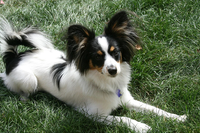

Hello dog. I think your breed is Papillon.


In [37]:
run_app(dog_files[480])

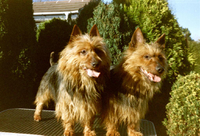

Hello dog. I think your breed is Australian terrier.


In [39]:
run_app(dog_files[580])

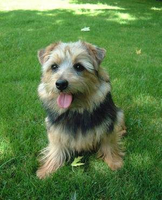

Hello dog. I think your breed is Norfolk terrier.


In [45]:
run_app(dog_files[642])

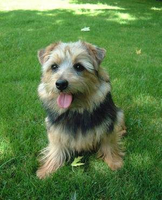

Hello dog. I think your breed is Silky terrier.


In [47]:
run_app(dog_files[642])

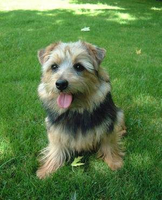

Hello dog. I think your breed is Norwich terrier.


In [51]:
run_app(dog_files[642])

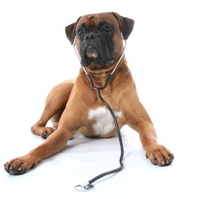

Hello you. I do not recognize you to be a dog or a human.


In [52]:
run_app(dog_files[1042])

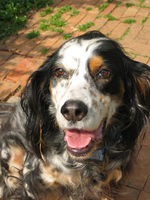

Hello dog. I think your breed is English setter.


In [55]:
run_app(dog_files[1568])

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

The algorithm works quite ok, but still not as well as it could. Currently it does the human face detection pretty well (as long as dogs are detected first), so the dog detector and the breed classifier are the ones that would need improvements.

- The original VGG16 model is trained with huge amount of classes so it is not ideal for dog detection. It could be changed to a more valid model (f.ex. resnet that seemed to work better than VGG16 with the test data) or trained to especially detect if an image is a dog or not.
- The train set per breed was not that big, so more dog images would make the model better. The images should also be from different angles, have breeds in different colours etc. to have more variations of each breed.
- Finding the perfect classifier would need experimenting with weight initializing, drop out percentages, batch sizes, learning rates and optimizers. Transforming the datasets more would also help making the breed classifier better.

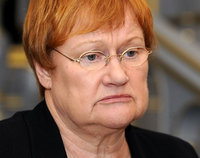

Hello human. If you were a dog you would be a Chinese crested!


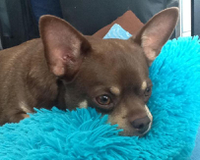

Hello you. I do not recognize you to be a dog or a human.


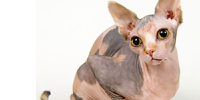

Hello you. I do not recognize you to be a dog or a human.


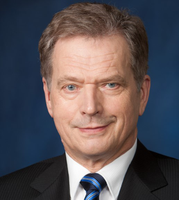

Hello human. If you were a dog you would be a Welsh springer spaniel!


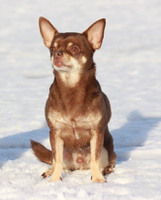

Hello dog. I think your breed is Chihuahua.


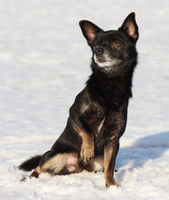

Hello dog. I think your breed is Chihuahua.


In [35]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

path = 'own_test_images/*'
files = np.array(glob(path))

for file in np.hstack(files):   
    run_app(file)
